In [62]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot as plt

In [63]:
data = pd.read_csv('../data/data.csv')
x = data.drop(columns=['label'])
y = data['label']

In [64]:
def display_importances(imp, names):
    imp, names = zip(*sorted(zip(imp, names)))
    plt.barh(range(len(names)), imp)
    plt.yticks(range(len(names)), names)
    plt.show()

In [65]:
features_names = ['characters_count', 'and_or_count', 'blank_line', 'capital_start', 'end_dot', 'imperative_start', 'wrap_to_72',
                  'verb_direct_obj', 'changed_files_count', 'changes_methods_count', 'files_to_body_ratio',
                  'methods_to_body_ratio', 'methods_long', 'methods_complexity', 'methods_parameters',
                  'added_lines', 'removed_lines']

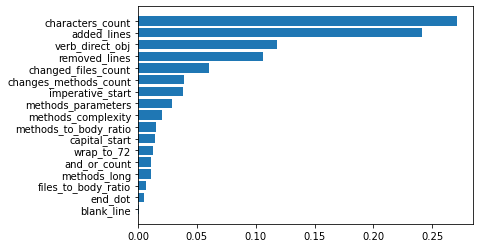

In [66]:
clf = DecisionTreeClassifier()
clf.fit(x, y)
display_importances(clf.feature_importances_, features_names)

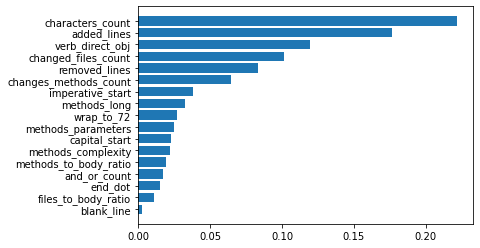

In [67]:
clf = RandomForestClassifier()
clf.fit(x, y)
display_importances(clf.feature_importances_, features_names)

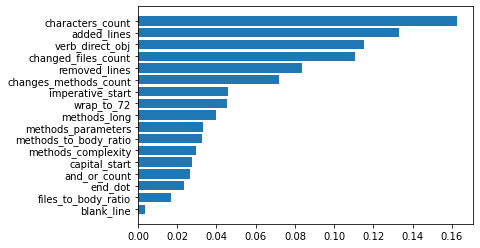

In [68]:
clf = ExtraTreesClassifier()
clf.fit(x, y)
display_importances(clf.feature_importances_, features_names)

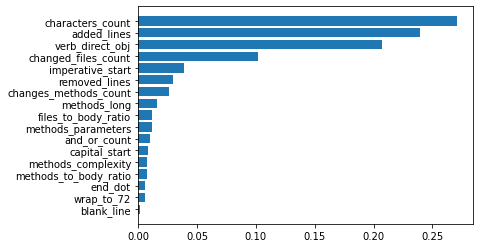

In [69]:
clf = GradientBoostingClassifier()
clf.fit(x, y)
display_importances(clf.feature_importances_, features_names)

DecisionTreeClassifier: [highest 0.78] [accuracy 0.71] [time 0.56]

RandomForestClassifier: [highest 0.86] [accuracy 0.77] [time 15.11]

ExtraTreesClassifier: [highest 0.8] [accuracy 0.74] [time 13.71]

GradientBoostingClassifier: [highest 0.84] [accuracy 0.77] [time 38.41]

In [70]:
data1 = data.drop(columns=['files_to_body_ratio', 'methods_to_body_ratio', 'methods_long', 'methods_complexity', 'methods_parameters'])
print(data1.groupby('label').mean())

         characters_count  and_or_count  blank_line  capital_start   end_dot  \
label                                                                          
bad             52.138158      0.769737    0.957237       0.582237  0.792763   
good            36.381395      0.951163    0.990698       0.793023  0.806977   
neutral         37.969925      0.890977    0.969925       0.642857  0.763158   

         imperative_start  wrap_to_72  verb_direct_obj  changed_files_count  \
label                                                                         
bad              0.384868    0.621711         0.529605             8.598684   
good             0.786047    0.893023         0.976744             2.053488   
neutral          0.601504    0.789474         0.793233             3.357143   

         changes_methods_count  added_lines  removed_lines  
label                                                       
bad                  14.845395   441.546053     185.753289  
good                

In [71]:
data = data[data.methods_complexity  != -1]
print(data.groupby('label')['methods_complexity'].mean())

label
bad        0.869508
good       0.919628
neutral    0.878938
Name: methods_complexity, dtype: float64


In [72]:
data = data[data.methods_parameters != -1]
print(data.groupby('label')['methods_parameters'].mean())

label
bad        0.828683
good       0.939212
neutral    0.845000
Name: methods_parameters, dtype: float64


In [73]:
data = data[data.methods_long != -1]
print(data.groupby('label')['methods_long'].mean())

label
bad        0.739295
good       0.860075
neutral    0.731429
Name: methods_long, dtype: float64
